# CSAT Clusters Visualization
This notebook summarizes and visualizes the results of the TF-IDF + KMeans clustering and the LLM-generated summaries.

**Goals:**
1. Analyze the distribution of CSAT scores.  
2. Compare clusters by average CSAT and size.  
3. Identify the *worst* clusters (lowest satisfaction).  
4. Display the LLM summaries for quick interpretation.


## Cell 1 — Title and Context

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 5)


## Cell 2 — Imports

In [2]:
# Load the clustered data and LLM summaries
df = pd.read_csv("../data/csat_with_clusters.csv")
summ = pd.read_csv("../data/cluster_summaries.csv")

print(f"Rows: {len(df)}")
print(f"Clusters: {df['cluster'].nunique()}")

# Convert CSAT to numeric, just in case
df["csat"] = pd.to_numeric(df["csat"], errors="coerce")


Rows: 36161
Clusters: 10


## Cell 3 — Load data

In [3]:
# Load the clustered data and LLM summaries
df = pd.read_csv("../data/csat_with_clusters.csv")
summ = pd.read_csv("../data/cluster_summaries.csv")

print(f"Rows: {len(df)}")
print(f"Clusters: {df['cluster'].nunique()}")

# Convert CSAT to numeric, just in case
df["csat"] = pd.to_numeric(df["csat"], errors="coerce")


Rows: 36161
Clusters: 10


## Cell 4 — Basic CSAT Distribution

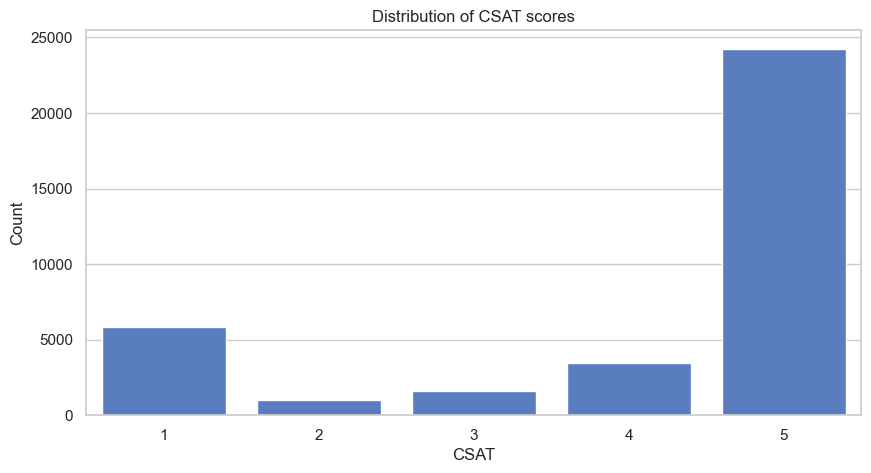

count    36161.000000
mean         4.086474
std          1.506940
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: csat, dtype: float64


In [4]:
sns.countplot(x="csat", data=df)
plt.title("Distribution of CSAT scores")
plt.xlabel("CSAT")
plt.ylabel("Count")
plt.show()

print(df["csat"].describe())


## Cell 5 — Mean CSAT per cluster 

In [5]:
cluster_stats = df.groupby("cluster")["csat"].agg(["count", "mean"]).reset_index()
cluster_stats = cluster_stats.merge(
    summ[["cluster", "llm_summary"]], on="cluster", how="left"
)
cluster_stats = cluster_stats.sort_values("mean", ascending=False)
cluster_stats.head()


,cluster,count,mean,llm_summary
5,5,199,4.989950,**Titre :** Service Excellent\n\n**Idées princ...
0,0,688,4.968023,**Titre :** Service Client Exemplaire\n\n**Idé...
7,7,622,4.966238,**Titre :** Professionnalisme des conseillers\...
6,6,851,4.944771,**Titre :** Satisfaction totale\n\n**Idées pri...
8,8,4260,4.923944,### Titre : Service Client Exemplaire\n\n### I...


## Cell 6 — Bar plot of cluster averages

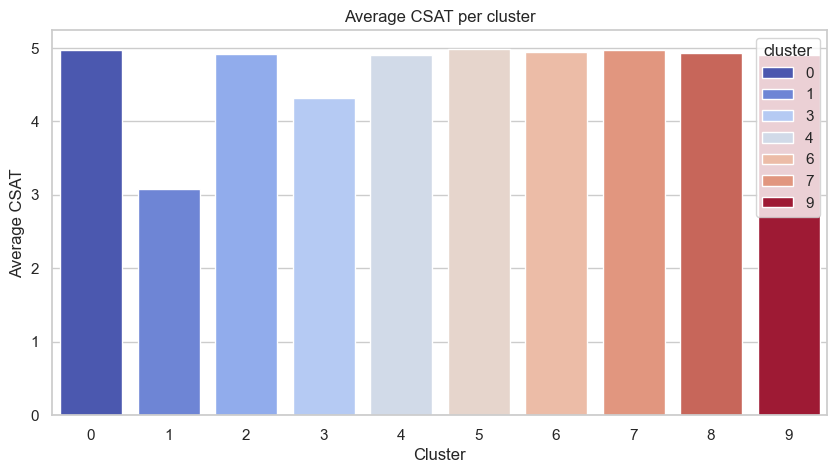

In [11]:
plt.figure(figsize=(10, 5))
sns.barplot(x="cluster", y="mean", hue="cluster", data=cluster_stats, palette="coolwarm")
plt.title("Average CSAT per cluster")
plt.ylabel("Average CSAT")
plt.xlabel("Cluster")
plt.show()


## Cell 7 — Cluster sizes 

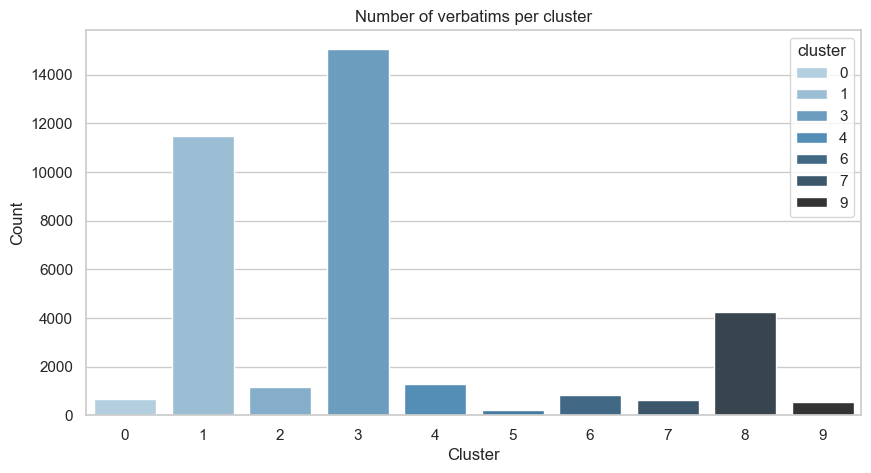

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x="cluster", y="count", hue="cluster", data=cluster_stats, palette="Blues_d")
plt.title("Number of verbatims per cluster")
plt.ylabel("Count")
plt.xlabel("Cluster")
plt.show()


## Cell 8 — Top negative clusters 

In [8]:
low_csat = cluster_stats[cluster_stats["count"] >= 50].sort_values("mean").head(5)
low_csat[["cluster", "count", "mean", "llm_summary"]]


,cluster,count,mean,llm_summary
1,1,11469,3.075682,### Titre : Communication Clientèle\n\n#### Ré...
3,3,15074,4.317965,**Titre court :** Qualité du service\n\n**Idée...
9,9,543,4.896869,**Titre :** Satisfaction Client Élevée\n\n**Id...
4,4,1297,4.909021,**Titre :** Satisfaction Client\n\n**Idées pri...
2,2,1158,4.919689,**Titre :** Service Efficace\n\n**Idées princi...


## Cell 9 — Display readable summaries

In [9]:
for _, row in low_csat.iterrows():
    summary = textwrap.fill(str(row["llm_summary"]), width=120)
    print(f"\n{'='*80}")
    print(f"Cluster {int(row['cluster'])} | n={int(row['count'])} | CSAT mean={row['mean']:.2f}")
    print(summary)



Cluster 1 | n=11469 | CSAT mean=3.08
### Titre : Communication Clientèle  #### Résumé des idées principales : 1. **Manque de communication** : Les clients
expriment un besoin accru d'informations claires et régulières, notamment concernant la sécurité et les procédures (ex.
démarchage, activation de services). 2. **Qualité du service client** : Bien que certains conseillers soient appréciés
pour leur écoute et leur aide, d'autres sont perçus comme agressifs ou peu attentifs, ce qui nuit à l'expérience client.
3. **Procédures complexes** : Les clients trouvent que les procédures sont trop compliquées et manquent de clarté, ce
qui entraîne des frustrations et des déplacements inutiles.  #### Actions concrètes à entreprendre : 1. **Renforcer la
communication** : Mettre en place une campagne d'information régulière par email pour tenir les clients informés des
changements, des procédures et des questions de sécurité. 2. **Former le personnel** : Offrir des formations
supplémentaires à tou

# Conclusions

- The dataset shows a strong positive skew: most responses are 5⭐ (high satisfaction).
- One or two clusters dominate in size — these correspond to *generic positive feedback*.
- Clusters with lowest average CSAT reveal concrete issues:
  - **Technician delays**
  - **Network or fiber issues**
  - **Billing/refund problems**
- LLM summaries provide immediate business insights for each theme.
- Future improvement: filter by low CSAT before clustering to better balance topics.
